In [1]:
%cd ..

c:\Users\CARNOT\customer segmentation\customer_segmentation


In [15]:
import pandas as pd
import yaml
import numpy as np
from src.features.build_features import featurization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import KernelPCA
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
plt.style.use("seaborn-dark")
%matplotlib inline

In [3]:
featurization("params.yaml")

In [16]:
with open("params.yaml") as file:
    config = yaml.safe_load(file)

In [5]:
df = pd.read_csv(config["data_loader"]["processed_data"])

In [6]:
X = df.copy().values

In [7]:
kpca = KernelPCA(n_components=2,kernel="rbf", random_state=config["random_state"])
X_kpca = kpca.fit_transform(X)

In [19]:
with open(config["data_loader"]["X_kpca"], "wb") as file:
    pk.dump(X_kpca, file)

<AxesSubplot:>

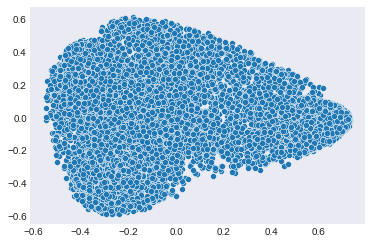

In [9]:
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1])

In [10]:
inertia = []
silhouette_scores = []
n_cluster_range = range(2, config["train"]["n_cluster_range"])

for x in n_cluster_range:
    clus_model = KMeans(n_clusters=x, random_state=config["random_state"])
    clus_model.fit(X_kpca)
    inertia.append(clus_model.inertia_)
    silhouette_scores.append(silhouette_score(df, clus_model.labels_, random_state=config["random_state"]))


In [11]:
hyper_metrics = {"inertia":inertia, "silhouette_scores": silhouette_scores}
with open(config["report"]["metrics"]["hyper_metrics"], "w") as file:
    json.dump(hyper_metrics, file)

In [12]:
def n_cluster_visual(path: str, y):

    plt.figure(figsize=(10,8))
    plt.plot(n_cluster_range, y)
    plt.grid(b=True, which="major", axis="both", color="green", linewidth=.5)
    plt.xlabel("N-CLUSTERS", size=15, weight="bold")
    if y[0] >= 1.1:
        plt.ylabel("INERTIA", size=15, weight="bold")
    else:
        plt.ylabel("silhouette".upper(), size=15, weight="bold")
    plt.title("No. Clusters Vs Inertia", size=22, weight="bold")
    plt.savefig(path);

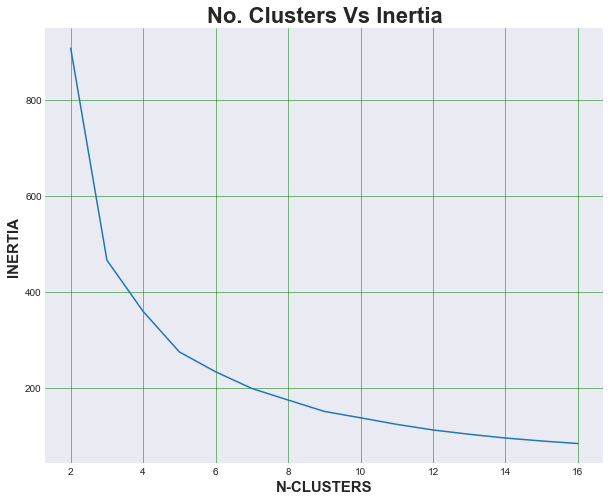

In [13]:
n_cluster_visual(config["report"]["visual"]["no_clustersvsinertia"], y=inertia)

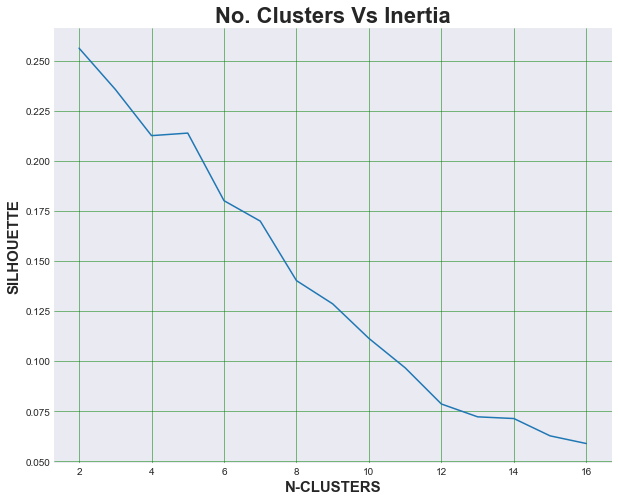

In [14]:
n_cluster_visual(config["report"]["visual"]["no_clustersvssilhouette"], y=silhouette_scores)